# Green Destination Attrition Classification Problem. 
### Find out which employee are more likely for attrition.

#### Mapping of Output column
`'No': 0, 'Yes': 1`

# Importing Libs

In [1]:
# Data Loading 
import pandas as pd

# Data split, Cross validation, and Hyperparameter tune
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_importance

# Evaluation 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Visualizing differ models
import matplotlib.pyplot as plt
import seaborn as sns

# Dumping model
import pickle

# Loading Data 

In [2]:
green_df_enc = pd.read_csv("Others//green_dest_enc_ml_ready.csv")

In [3]:
green_df_enc.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0


In [4]:
green_df_enc.dtypes

Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceLastPromotion              int64
YearsWithCurrManager                 int64
Attrition_n

# Data Split - Train Test

In [5]:
X = green_df_enc.drop("Attrition_n", axis=1)
y = green_df_enc["Attrition_n"]

In [6]:
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,0,0,0,0,0,0,1,0,1,0
1466,39,613,6,1,4,42,2,3,1,9991,...,0,0,0,0,0,0,1,0,1,0
1467,27,155,4,3,2,87,4,2,2,6142,...,1,0,0,0,0,0,1,0,0,1
1468,49,1023,2,3,4,63,2,2,2,5390,...,0,0,0,1,0,0,1,0,1,0


In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition_n, Length: 1470, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

In [9]:
# Shapes
print(f'X train: {X_train.shape}')
print(f'X test: {X_test.shape}')
print(f'y train: {y_train.shape}')
print(f'y test: {y_test.shape}')

X train: (1176, 51)
X test: (294, 51)
y train: (1176,)
y test: (294,)


# Model Training & Evaluation  

In [10]:
# Model Initialization with class weight (Helpfull for imbalanced data)
models = {
    "LogisticRegression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(class_weight='balanced'),
    "RandomForest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVC": SVC(class_weight='balanced')
}

In [11]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"\n{name}:\n")
    print(classification_report(y_test, preds))

D:\Projects\Green_Destination_Analysis_ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



LogisticRegression:

              precision    recall  f1-score   support

           0       0.93      0.71      0.80       247
           1       0.31      0.70      0.43        47

    accuracy                           0.71       294
   macro avg       0.62      0.71      0.62       294
weighted avg       0.83      0.71      0.74       294


DecisionTree:

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       247
           1       0.23      0.23      0.23        47

    accuracy                           0.76       294
   macro avg       0.54      0.54      0.54       294
weighted avg       0.76      0.76      0.76       294


RandomForest:

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       247
           1       0.62      0.11      0.18        47

    accuracy                           0.85       294
   macro avg       0.74      0.55      0.55       294
weighted avg       0

* Model Accuracy Visualization

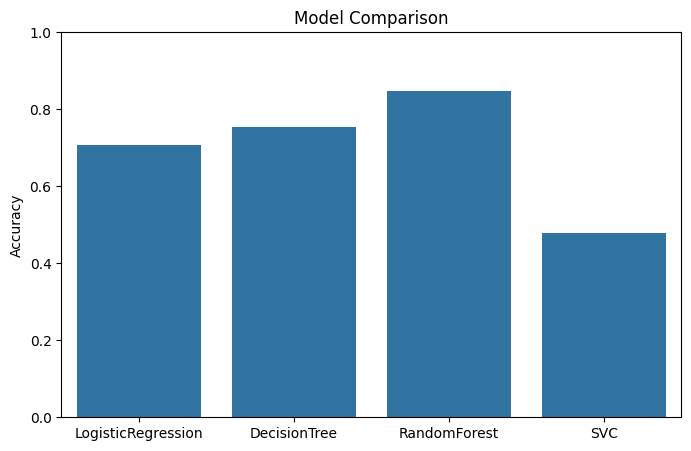

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()

# Advance Technique

*As we can observe that our model prediction towards rare class is worst. We will use XGBOOST in hope for better prediction.*

* XGBOOST 

In [13]:
# Calculate scale_pos_weight (ratio of majority to minority class)
scale_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

In [14]:
# Build the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_weight)

In [15]:
# Train
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.58      0.32      0.41        47

    accuracy                           0.85       294
   macro avg       0.73      0.64      0.66       294
weighted avg       0.83      0.85      0.84       294



D:\Projects\Green_Destination_Analysis_ML\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:40:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Hyperparameter Tuning of XGBOOST

Results are still not impressing, especially recall. We will now perform hyperparameter tuning using grid search cv.

In [16]:
# Params grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

In [17]:
# Model definition for imbalance handling
scale_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_weight,
    random_state=42
)

In [18]:
# Grid Search with 5 fold test
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',   # or 'recall' if you prioritize recall
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [19]:
# Train
grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


D:\Projects\Green_Destination_Analysis_ML\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:40:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

In [20]:
# Best model 
best_model = grid.best_estimator_

In [21]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [22]:
# Evaluate
y_pred = best_model.predict(X_test)
print("Best Parameters:", grid.best_params_)
print(classification_report(y_test, y_pred))

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       247
           1       0.39      0.47      0.43        47

    accuracy                           0.80       294
   macro avg       0.64      0.67      0.65       294
weighted avg       0.81      0.80      0.81       294



This model is slightly balanced in precision and recall for minority class. However, model is still a mediocre.

<Figure size 700x500 with 0 Axes>

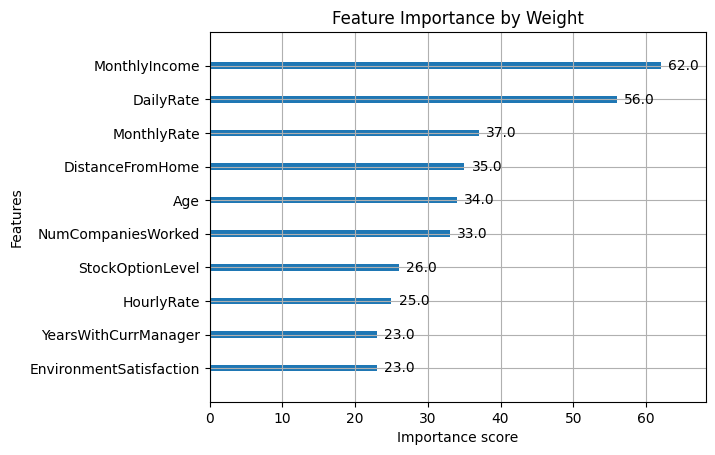

In [23]:
# Create figure with specific size
plt.figure(figsize=(7, 5))

# Plot importance: Weight
plot_importance(best_model, max_num_features=10, importance_type='weight')
plt.title('Feature Importance by Weight')
plt.show()

# Final Prediction

In [24]:
best_model.predict([[41, 1102, 1, 2, 2, 94, 3, 2, 4, 5993, 19479, 8, 11, 3, 1, 0, 8, 0, 1, 6, 4, 0, 5, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1]])

array([1])

*Our model predicted correctly. This was the first row of X. The first value in y is 1.*

### Columns needed for input:
`'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes'`

In [25]:
!pip install joblib streamlit


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Dumping the model

In [26]:
import joblib

joblib.dump(best_model, 'attrition_model.pkl')

['attrition_model.pkl']

# StreamLit App

Refer app.py

# Future Scope
1. Model can be trained on less number of features.
2. SMOTE can be implemented for making data balance.